### all data used from Frost et al., 2001

**To do (optional)**
- Color coding should be optimized accros figures for clarity

In [56]:
import numpy as np
import pandas as pd

import os
import pickle

import utm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from collections import OrderedDict

In [2]:
class_major = pd.read_excel("../_PETRO/classification_workdata.xlsx", index_col=0, 
                            usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26])

## Fe-number


### FeO/(FeO+MgO) = 0.446+ 0.0046 * wt% SiO2 --> from Miyasiro, 1970

In [4]:
def Fe_number_classification(df):
    """Perform classification according to Fe-number cf. Miyasiro (1970)
    Classification results in 'ferroan' or 'magnesian'
    """
    
    # Calculate temporary variables needed for classification
    df["FeO/(FeO+MgO)"] = df["FeO"] / (df["FeO"] + df["MgO"])
    df["Miyashiro value"] = 0.446 + 0.0046 * df["SiO2"]
    df["Fe-miyashiro"] = df["FeO/(FeO+MgO)"] - df["Miyashiro value"]
    
    # Perform classification
    bins = [-99, 0, 99] # negative or positive
    cats = ["magnesian", "ferroan"] # classes
    # Assign classes to original dataframe
    df["Fe-number"] = pd.cut(df["Fe-miyashiro"], bins=bins, labels=cats)
    
    # Set Fe-number as categorical variable
    df["Fe-number"] = df["Fe-number"].astype("category").cat.reorder_categories(["ferroan", "magnesian"], ordered=True)

    # Drop temporary variables
    df = df.drop(["Miyashiro value", "Fe-miyashiro"], axis=1)
    
    return df

In [5]:
class_major = Fe_number_classification(class_major)

In [6]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,Na2O,K2O,P2O5,l.i.,oth,sum,hs,time,FeO/(FeO+MgO),Fe-number
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,1.995012,3.581047,0.009975,0.349127,0.009975,100.0,0.01,K2,0.811321,magnesian
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,2.307847,5.117399,0.050171,0.501706,0.010034,100.0,0.01,Tr,0.583333,magnesian
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.749700,6.147541,0.009996,1.019592,0.079968,100.0,0.30,K2,0.935135,ferroan
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,3.684576,4.220876,0.009931,0.258218,0.009931,100.0,0.01,K1,0.625000,magnesian
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,1.510934,3.061630,0.009940,1.739563,0.159046,100.0,0.28,K1,0.981132,ferroan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,4.110956,2.005588,0.588705,1.476751,0.009978,100.0,0.30,K1,0.567352,magnesian
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,2.653102,1.635747,0.259326,0.797925,0.009974,100.0,0.01,K2,0.639403,magnesian
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,2.670121,2.231743,0.468267,1.484507,0.029889,100.0,0.47,J3,0.471971,magnesian
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,4.043825,1.085657,0.458167,2.589641,0.009960,100.0,0.47,K2,0.604920,magnesian


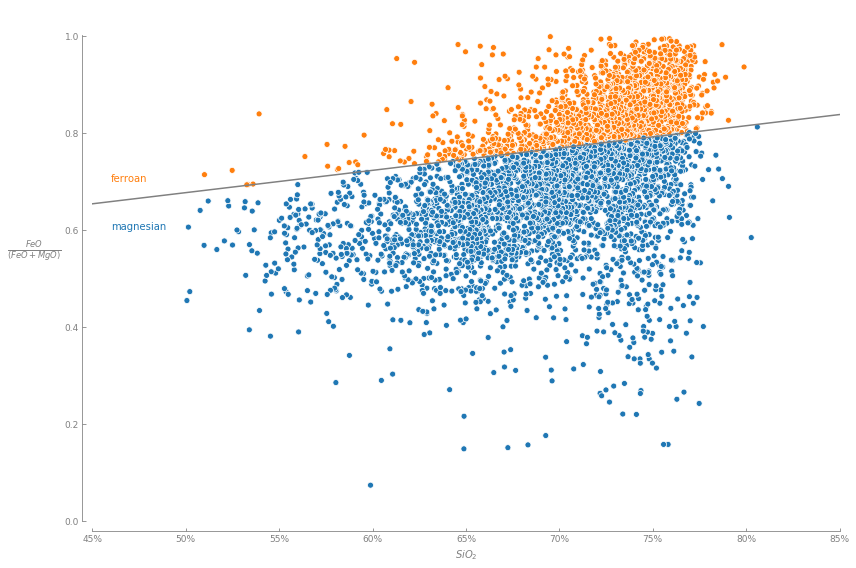

In [7]:
SiO2 = np.arange(0, 101, 1)

fig, ax = plt.subplots(figsize=(12, 8))

# Boundary line between ferroan an magnesian
ax.text(46, 0.7, "ferroan", color=sns.color_palette()[1])
ax.plot(SiO2, 0.446 + 0.0046 * SiO2, 'grey')
ax.text(46, 0.6, "magnesian", color=sns.color_palette()[0])

sns.scatterplot(x="SiO2" , y="FeO/(FeO+MgO)", data=class_major, hue="Fe-number", ax=ax, legend=False)

ax.set_xlim(45, 85)
ax.set_ylim(0, 1.06)

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$\frac{FeO}{(FeO+MgO)}$', rotation=0, labelpad=30, color='grey', fontsize=12)
ax.set_xlabel(r'$SiO_{2}$', color='grey')

# Rewrite the x axis labels
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# # Display legend but reverse default order to be in line with figure
# handles, labels = ax.get_legend_handles_labels()
# # Store title entry
# handles_alt = handles[:1]
# labels_alt = labels[:1]
# # Extend title entry with legend entries in reverse order
# handles_alt.extend(reversed(handles[1:]))
# labels_alt.extend(reversed(labels[1:]))
# # Plot legend with altered handles and labels
# plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

plt.tight_layout()

plt.savefig("../_FIGURES/classification/Fe-number_classification.pdf")

plt.show();

## MALI (modified alkali-lime index) 

### based on alkali-lime index of Peacock (1931)

#### --> Na2O + K2O - CaO = -41.86 + 1.112 * wt% SiO2 - 0.00572 * wt% SiO2² boundary between alkalic and alkali-calcic
#### --> Na2O + K2O - CaO = -44,72 + 1.094 * wt% SiO2 - 0.00527 * wt% SiO2² boundary between alkali-calcic and calc-alkalic
#### --> Na2O + K2O - CaO = -45.36 + 1.0043 * wt% SiO2 - 0.00427 * wt% SiO2² boundary between calc-alkalic and calcic

In [8]:
def MALI_classification(df):
    """Perform Modified Alkali-Lime Index classification based on Peacock (1931)
    Classification results in 'alkalic', 'alkali-calcic', 'calc-alkalic' or 'calcic'
    """
    
    df["Na2O+K2O-CaO"] = df["Na2O"] + df["K2O"] - df["CaO"]
    
    SiO2 = df["SiO2"]
    
    # Calculate boundary lines
    df["al_al-calc"] =      -41.86 + (1.1120 * SiO2) - (0.00572 * SiO2 ** 2)
    df["al-calc_calc-al"] = -44.72 + (1.0940 * SiO2) - (0.00527 * SiO2 ** 2)
    df["calc-al_calc"] =    -45.36 + (1.0043 * SiO2) - (0.00427 * SiO2 ** 2)

    df["al_al-calc_Bound"] = df["Na2O+K2O-CaO"] - df["al_al-calc"]
    df["al-calc_calc-al_Bound"] = df["Na2O+K2O-CaO"] - df["al-calc_calc-al"]
    df["calc-al_calc_Bound"] = df["Na2O+K2O-CaO"] - df["calc-al_calc"]
    
    # Perform classification
    df["MALI"] = np.where(df["calc-al_calc_Bound"] >= 0, 'calc-alkalic', 'calcic')
    df["MALI"] = np.where(df["al-calc_calc-al_Bound"]  >= 0, 'alkali-calcic', df["MALI"] )
    df["MALI"] = np.where(df["al_al-calc_Bound"] >= 0, 'alkalic', df["MALI"])
    
    # Set MALI as categorical variable
    df["MALI"] = df["MALI"].astype("category").cat.reorder_categories(["alkalic", "alkali-calcic", "calc-alkalic", "calcic"], ordered=True)

    # Drop temporary classification variables
    df = df.drop(["al_al-calc", "al-calc_calc-al", "calc-al_calc", 
                  "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound"], axis=1)
    
    return df

In [9]:
class_major = MALI_classification(class_major)

In [10]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,P2O5,l.i.,oth,sum,hs,time,FeO/(FeO+MgO),Fe-number,Na2O+K2O-CaO,MALI
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,0.009975,0.349127,0.009975,100.0,0.01,K2,0.811321,magnesian,5.027431,calcic
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,0.050171,0.501706,0.010034,100.0,0.01,Tr,0.583333,magnesian,7.074052,calcic
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.009996,1.019592,0.079968,100.0,0.30,K2,0.935135,ferroan,6.757297,calcic
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,0.009931,0.258218,0.009931,100.0,0.01,K1,0.625000,magnesian,7.240044,calcic
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,0.009940,1.739563,0.159046,100.0,0.28,K1,0.981132,ferroan,3.330020,calcic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,0.588705,1.476751,0.009978,100.0,0.30,K1,0.567352,magnesian,-1.885851,alkali-calcic
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,0.259326,0.797925,0.009974,100.0,0.01,K2,0.639403,magnesian,-4.149212,calc-alkalic
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,0.468267,1.484507,0.029889,100.0,0.47,J3,0.471971,magnesian,-3.516987,calc-alkalic
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,0.458167,2.589641,0.009960,100.0,0.47,K2,0.604920,magnesian,-4.243028,calc-alkalic


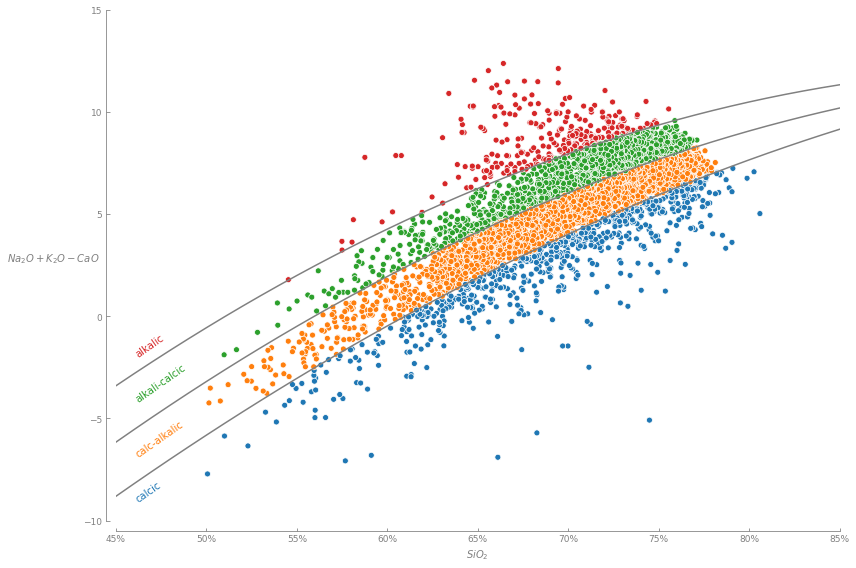

In [11]:
SiO2 = np.arange(0, 101, 1)

fig, ax = plt.subplots(figsize=(12, 8))

text_rot_angle = 35

# boundary between alkalic and alkali-calcic
ax.text(46, -2, "alkalic", color=sns.color_palette()[3], rotation=text_rot_angle)
ax.plot(-41.86 + 1.112 * SiO2 - (0.00572 * SiO2 * SiO2), color='grey')
ax.text(46, -4.2, "alkali-calcic", color=sns.color_palette()[2], rotation=text_rot_angle)

# boundary between alkali-calcic and calc-alkalic
ax.plot(-44.72 + 1.094 * SiO2 - (0.00527 * SiO2 * SiO2), color='grey')
ax.text(46, -6.9, "calc-alkalic", color=sns.color_palette()[1], rotation=text_rot_angle)

# boundary between calc-alkalic and calcic
ax.plot(-45.36 + 1.0043 * SiO2 - (0.00427 * SiO2 * SiO2), color='grey')
ax.text(46, -9.1, "calcic", color=sns.color_palette()[0], rotation=text_rot_angle)

sns.scatterplot(x="SiO2", y="Na2O+K2O-CaO", data=class_major, hue='MALI', ax=ax, legend=False)

# Check first sample
# plt.scatter(class_major.loc[1, "SiO2"], class_major.loc[1, "Na2O+K2O-CaO"], color="r", zorder=10)
# Check last sample
# plt.scatter(class_major.loc[4659, "SiO2"], class_major.loc[4659, "Na2O+K2O-CaO"], color="r", zorder=10)

ax.set_xlim((45, 85))
ax.set_ylim((-10, 15))

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$Na_{2}O+K_{2}O-CaO$', rotation=0, labelpad=30, color='grey')
ax.set_xlabel(r'$SiO_{2}$', color='grey')
# plt.title('MALI')

# Rewrite the x axis labels
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# # Display legend but reverse default order to be in line with figure
# handles, labels = ax.get_legend_handles_labels()
# # Store title entry
# handles_alt = handles[:1]
# labels_alt = labels[:1]
# # Extend title entry with legend entries in reverse order
# handles_alt.extend(reversed(handles[1:]))
# labels_alt.extend(reversed(labels[1:]))
# # Plot legend with altered handles and labels
# plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

plt.tight_layout()

plt.savefig("../_FIGURES/classification/MALI_classification.pdf")

plt.show();

## ASI (aluminum saturation index) 

### defined as the molecular ratio Al/(Ca - 1.67P + Na +K) --> (Shand, 1943)

#### ASI > 1.0 --> peraluminous (Zen, 1988)
#### ASI < 1.0 and Na+K < molecular Al --> metaluminous 
#### ASI < 1.0 and Na+K > molecular Al --> peralkaline (Zen, 1988)

In [12]:
def ASI_classification(df):
    """Perform Aluminium Saturation Index classification according to Shand (1943)
    Classification results in 'peraluminous', 'metaluminous' or 'peralkaline'
    """
    
    # Define molar masses of oxides
    molar_mass = {"Al2O3": (2 * 26.98 + 3 * 16.00),
                  "CaO"  : (40.08 + 16.00),
                  "P2O5" : (2 * 30.97 + 5 * 16.00),
                  "Na2O" : (2 * 22.99 + 16.00),
                  "K2O"  : (2* 39.10 + 16.00),
                   }
    
    # Calculate moles per oxide
    df['moles_Al2O3'] = df['Al2O3'] / molar_mass['Al2O3']
    df['moles_CaO'] = df['CaO'] / molar_mass['CaO']
    df['moles_P2O5'] = df['P2O5'] / molar_mass['P2O5'] 
    df['moles_Na2O'] = df['Na2O'] / molar_mass['Na2O']
    df['moles_K2O'] = df['K2O'] / molar_mass['K2O']
    
    # Calculat ASI value and Na+K-Al value
    df["ASI_value"] = df["moles_Al2O3"]/(df["moles_CaO"] - 1.67 * df["moles_P2O5"] + df["moles_Na2O"] + df["moles_K2O"])
    df["Na+K-Al"] = df["moles_Na2O"] + df["moles_K2O"] - df["moles_Al2O3"]
    
    # Perform classification
    df["ASI"] = np.where(df["Na+K-Al"]  < 0, 'metaluminous', 'peralkaline')
    df["ASI"] = np.where(df["ASI_value"] >= 1, 'peraluminous', df["ASI"])
    
    # Set ASI as categorical variable
    df["ASI"] = df["ASI"].astype("category").cat.reorder_categories(["peralkaline", "metaluminous", "peraluminous"], ordered=True)
    
    # Drop temporary variables
    df = df.drop(["moles_Al2O3", "moles_CaO", "moles_P2O5", "moles_Na2O", "moles_K2O"], axis=1)
    
    return df

In [13]:
class_major = ASI_classification(class_major)

In [14]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,sum,hs,time,FeO/(FeO+MgO),Fe-number,Na2O+K2O-CaO,MALI,ASI_value,Na+K-Al,ASI
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,100.0,0.01,K2,0.811321,magnesian,5.027431,calcic,1.244519,-0.029195,peraluminous
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,100.0,0.01,Tr,0.583333,magnesian,7.074052,calcic,1.022257,-0.007836,peraluminous
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,100.0,0.30,K2,0.935135,ferroan,6.757297,calcic,1.216041,-0.019604,peraluminous
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,100.0,0.01,K1,0.625000,magnesian,7.240044,calcic,0.809447,0.010356,peralkaline
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,100.0,0.28,K1,0.981132,ferroan,3.330020,calcic,1.265003,-0.042953,peraluminous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,100.0,0.30,K1,0.567352,magnesian,-1.885851,alkali-calcic,0.851634,-0.102627,metaluminous
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,100.0,0.01,K2,0.639403,magnesian,-4.149212,calc-alkalic,0.836935,-0.113564,metaluminous
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,100.0,0.47,J3,0.471971,magnesian,-3.516987,calc-alkalic,0.833467,-0.109410,metaluminous
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,100.0,0.47,K2,0.604920,magnesian,-4.243028,calc-alkalic,0.901482,-0.138240,metaluminous


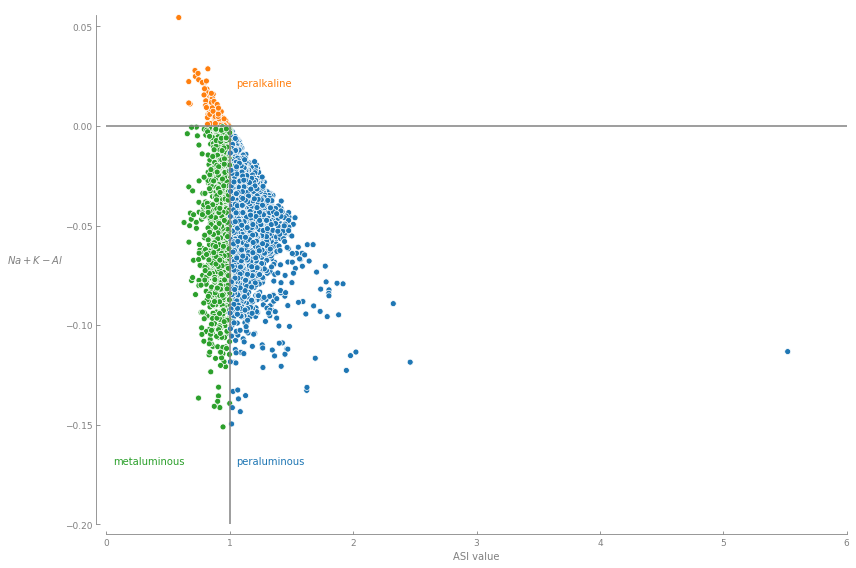

In [15]:
fg, ax = plt.subplots(figsize=(12, 8))

# Boundary between peralkaline and (metaluminous/peralumnious)
ax.text(1.05, 0.02, "peralkaline", color=sns.color_palette()[1])
ax.hlines(0, 0, 6, color='grey')

# Boundary between metalumnous and peraluminous
ax.text(0.05, -0.17, "metaluminous", color=sns.color_palette()[2])
ax.vlines(1, -0.20, 0, color='grey')
ax.text(1.05, -0.17, "peraluminous", color=sns.color_palette()[0])

sns.scatterplot(x="ASI_value", y="Na+K-Al", data=class_major, hue="ASI", legend=False)

ax.set_xlim((0, 6))
ax.set_ylim((-0.20, 0.06))

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$Na+K-Al$', rotation=0, labelpad=30, color='grey')
ax.set_xlabel('ASI value', color='grey')
# plt.title('MALI')

# # Display legend but reverse default order to be in line with figure
# handles, labels = ax.get_legend_handles_labels()
# # Store title entry
# handles_alt = handles[:1]
# labels_alt = labels[:1]
# # Extend title entry with legend entries in reverse order
# handles_alt.extend(reversed(handles[1:]))
# labels_alt.extend(reversed(labels[1:]))
# # Plot legend with altered handles and labels
# plt.legend(handles_alt, labels_alt, fontsize='small', loc='lower right')

plt.tight_layout()

plt.savefig("../_FIGURES/classification/ASI_classification.pdf")

plt.show();

# cleaning excel file

In [16]:
# Check number of present unique combinations
class_major[['Fe-number', 'MALI', 'ASI']].agg('/'.join, axis=1).nunique()

23

In [17]:
class_major["classificated"] = class_major[['Fe-number', 'MALI', 'ASI']].agg('/'.join, axis=1)

In [24]:
classification_count_pivot_df = class_major.pivot_table(values="classificated", index=["Fe-number", "MALI", "ASI"], aggfunc='count')
classification_count_pivot_df

classificated
Fe-number MALI          ASI                        
ferroan   alkalic       peralkaline            22.0
                        metaluminous           44.0
                        peraluminous           59.0
          alkali-calcic peralkaline            42.0
                        metaluminous          177.0
                        peraluminous          397.0
          calc-alkalic  peralkaline             5.0
                        metaluminous          104.0
                        peraluminous          605.0
          calcic        metaluminous           20.0
                        peraluminous          119.0
magnesian alkalic       peralkaline            15.0
                        metaluminous           77.0
                        peraluminous           67.0
          alkali-calcic peralkaline            31.0
                        metaluminous          330.0
                        peraluminous          492.0
          calc-alkalic  peralkaline             4.0
                        metaluminous          630.0
                        peraluminous          893.0
          calcic        peralkaline             1.0
                        metaluminous          179.0
                        peraluminous          346.0

In [54]:
categories = ["/".join(class_) for class_ in np.array(list(classification_count_pivot_df.index))]

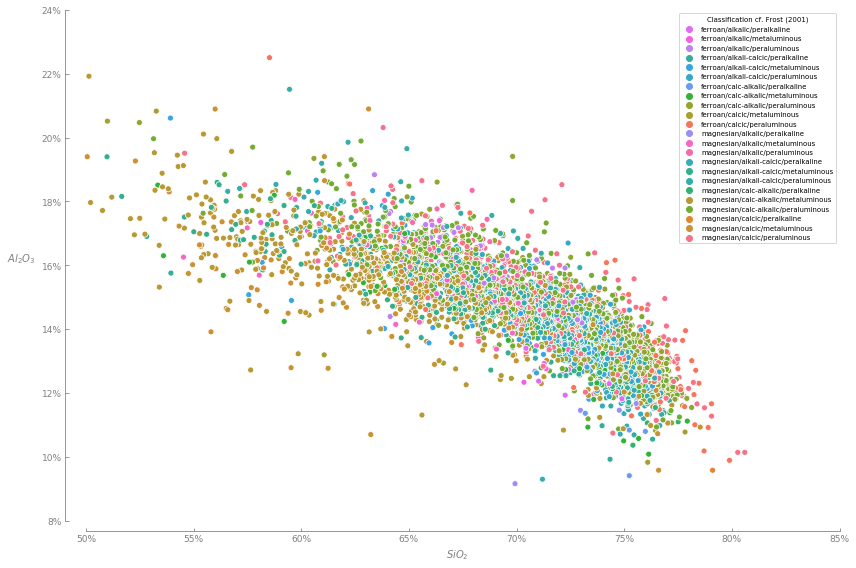

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x="SiO2", y="Al2O3", data=class_major, hue="classificated", ax=ax)

# Adjust legend to be in line with categorical data ordering
handles, labels = ax.get_legend_handles_labels()
handles = handles[1:]
labels = labels[1:]
keyorder = categories
by_label = OrderedDict(sorted(zip(labels, handles),
                              key=lambda i: keyorder.index(i[0])))
legend = ax.legend(by_label.values(), by_label.keys(),
                   fontsize='x-small', title="Classification cf. Frost (2001)")

plt.setp(legend.get_title(), fontsize='x-small')

ax.set_xlim((49.5, 85))
ax.set_ylim((8, 24))

# Adjust spines
# # Set the bounds of the spines
spines = ['left', 'bottom']
for loc, spine in ax.spines.items():
    if loc in spines:
        spine.set_position(('outward', 10))  # outward by 10 points
        spine.set_smart_bounds(True)
        spine.set_color('grey')
    else:
        spine.set_color('none')  # don't draw spine

# Set general tick parameters
ax.tick_params(axis='both', direction='in', colors='grey', labelsize=9)

# Set facecolor of figure
plt.gcf().set_facecolor('white')

ax.set_ylabel(r'$Al_{2}O_{3}$', rotation=0, labelpad=20, color='grey')
ax.set_xlabel(r'$SiO_{2}$', color='grey')

# Rewrite the x axis labels
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Rewrite the y axis labels
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

plt.tight_layout()

plt.savefig("../_FIGURES/classification/classification.pdf")
plt.show();

#### gives 23 !!different classes

# remarks


###### checked everything, Fe-number and MALi seem to be correct if i looked to the graphs (only one small error in the formula of one boundary, but that's resolved), the ASI had to be taken from the molecular ratio, so i calculated the amount of moles (still lot of the data belonging to the peraluminous group). Now there are 20 classes, so there are some classifications still wrong, but i don't see directly where the errors could occur --> maybe we can look to it this monday

# *Fe number 

## just to look if there were any differences

class_major["FeOtot/(FeOtot+MgO)"] = (class_major["FeO"]+class_major["Fe2O3"])/(class_major["FeO"]+class_major["Fe2O3"]+class_major["MgO"])
class_major["*Miyashiro value"] = 0.486 + 0.0046 * class_major["SiO2"]
class_major["*Fe-miyashiro"] = class_major["FeOtot/(FeOtot+MgO)"] - class_major["Miyashiro value"]

bins = [-99, 0, 99]
cats = ["magnesian", "ferroan"]
class_major["*Fe-number"] = pd.cut(class_major["*Fe-miyashiro"], bins=bins, labels=cats)

plt.figure(figsize=(15,10))
plt.scatter(class_major["SiO2"] , class_major["FeOtot/(FeOtot+MgO)"])
plt.plot(0.486 + 0.0046 * SiO2, 'red')
plt.xlim((45,85))
plt.ylabel('FeOtot/(FeOtot+MgO)%')
plt.xlabel('SiO2%')
plt.title('*Fe-number')

class_major.to_excel("../_Petro/classification_altereddata.xlsx")

class_major.loc[:, '*Fe-number']
class_major.iloc[:, 54].value_counts().to_excel("../_PETRO/Fetot-number_counts.xlsx")

class_major["classificated"] = class_major[['*Fe-number', 'Mali', 'ASI']].agg('/'.join, axis=1)
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

classification2 = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols = lambda column : column not in ["FeO/(FeO+MgO)", "Miyashiro value", "Fe-miyashiro", "Na2O+K2O-CaO", "al_al-calc", "al-calc_calc-al", "calc-al_calc", "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound", "ASI_value", "Na+K-Al", "FeOtot/(FeOtot+MgO)", "*Miyashiro value", "*Fe-miyashiro"])

classification.to_excel("../_Petro/classificated_try.xlsx")

classification.loc[:, 'classificated']
classification.iloc[:, 38].value_counts().to_excel("../_PETRO/classificated2_counts.xlsx")